In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import Dataset,DataLoader
import matplotlib.pyplot as plt
%matplotlib inline

# Model

In [2]:

class Generator(nn.Module):
    def __init__(self):
        super(Generator,self).__init__()
        
        size=32
        self.fc=nn.Sequential(
            nn.Linear(110,4*4*512),
            nn.ReLU()
        )
        
        self.layer=nn.Sequential(
            nn.ConvTranspose2d(512,size*8,3,2,1),
            nn.BatchNorm2d(size*8),
            nn.ReLU(),
            
            nn.ConvTranspose2d(size*8,size*4,4,2,1),
            nn.BatchNorm2d(size*4),
            nn.ReLU(),
            
            nn.ConvTranspose2d(size*4,1,4,2,1),
            nn.Tanh()        
        )
    
    def forward(self,x,y):
        x=torch.cat((x,y),1)
        out=self.fc(x)
        out=out.view(out.size(0),512,4,4)
        out=self.layer(out)        
        return out
        

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator,self).__init__()
        
        size=64
        self.fc=nn.Sequential(
            nn.Linear(784+10,784,bias=True),
            nn.LeakyReLU(0.2)
        )
        self.layer1=nn.Sequential(
            nn.Conv2d(1,size*8,3,2,1),
            nn.BatchNorm2d(size*8),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(size*8,size*4,3,2,1),
            nn.BatchNorm2d(size*4),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(size*4,size*2,3,2,1),
            nn.BatchNorm2d(size*2),
            nn.LeakyReLU(0.2),
            
            nn.Conv2d(size*2,size,3,2,1),
            nn.BatchNorm2d(size),
            nn.Tanh()
        )
        self.layer2=nn.Sequential(
            nn.Linear(256,1,bias=True),
            nn.Sigmoid()
        )
        
    def forward(self,x,y):
        x=x.view(x.size(0),-1)
        x=torch.cat((x,y),1)
        out=self.fc(x)
        out=out.view(out.size(0),1,28,28)
        out=self.layer1(out)
        out=out.view(out.size(0),-1)
        out=self.layer2(out)
        
        return out
    
g=Generator()

print(g.forward(torch.rand(1,100),torch.rand(1,10)).shape)

d=Discriminator()

print(d.forward(torch.rand(1,1,28,28),torch.rand(1,10)).shape)

torch.Size([1, 1, 28, 28])
torch.Size([1, 1])


In [3]:
def to_onehot(label):    
    onehot=torch.zeros(len(label),10)
    eye=torch.eye(10)
    for i in range(len(label)):
        onehot[i]=eye[label[i]]
    return onehot

# Train

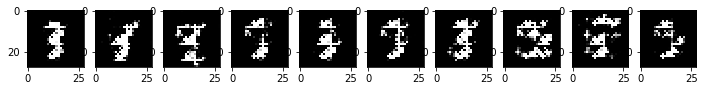

Epoch = 0 Gen = 2.2916308595920043 Dis = 0.7670540943819243


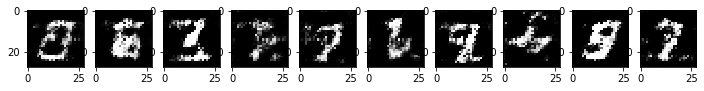

Epoch = 1 Gen = 1.975434442652441 Dis = 0.9103140332011271


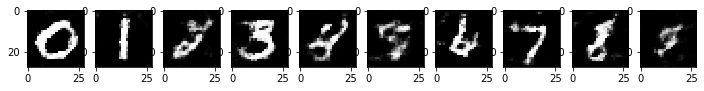

Epoch = 2 Gen = 1.5126839096008589 Dis = 1.1424088459342783


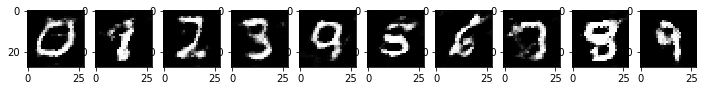

Epoch = 3 Gen = 1.0473149144319074 Dis = 1.2771481037902426


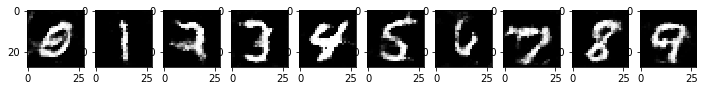

Epoch = 4 Gen = 0.9169244143817978 Dis = 1.3248041098687187


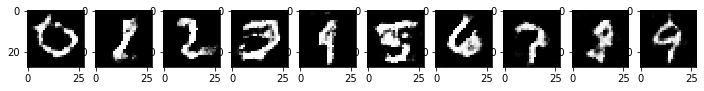

Epoch = 5 Gen = 0.8343261030595949 Dis = 1.3574155785127489


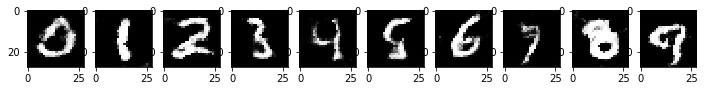

Epoch = 6 Gen = 0.7774899573976806 Dis = 1.3710870268756647


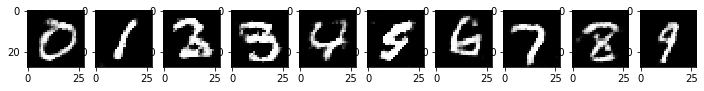

Epoch = 7 Gen = 0.7410537474063922 Dis = 1.37706021993145


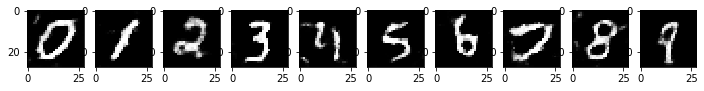

Epoch = 8 Gen = 0.7170178318964139 Dis = 1.3823093142844975


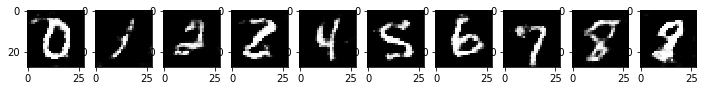

Epoch = 9 Gen = 0.7129608612896791 Dis = 1.3841525105271004


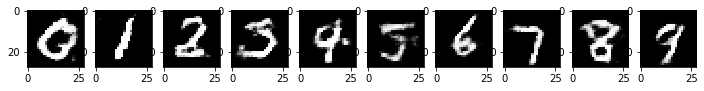

Epoch = 10 Gen = 0.700767115806974 Dis = 1.3859134632895496


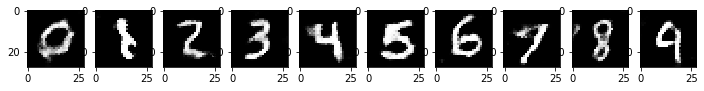

Epoch = 11 Gen = 0.7008537235163422 Dis = 1.385972444055431


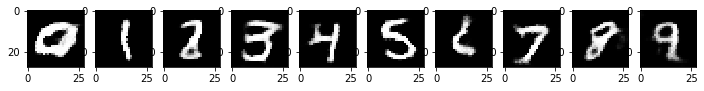

Epoch = 12 Gen = 0.7005195548412388 Dis = 1.3859981825865153


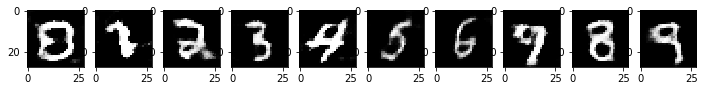

Epoch = 13 Gen = 0.6972194681289607 Dis = 1.3860480085110614


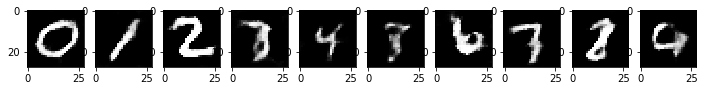

Epoch = 14 Gen = 0.698734093068251 Dis = 1.385640707732772


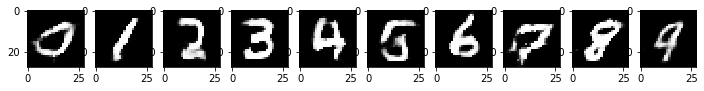

Epoch = 15 Gen = 0.6969373024094587 Dis = 1.3861296692890908


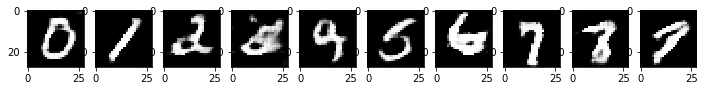

Epoch = 16 Gen = 0.6961656919420401 Dis = 1.3861931897938125


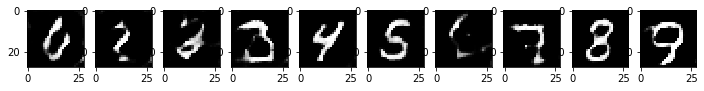

Epoch = 17 Gen = 0.6982181698782866 Dis = 1.3862087463519213


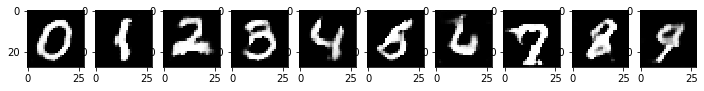

Epoch = 18 Gen = 0.6977794973580822 Dis = 1.386200882732741


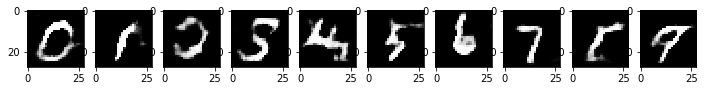

Epoch = 19 Gen = 0.6994798918967562 Dis = 1.385703063468689


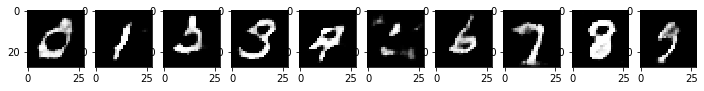

Epoch = 20 Gen = 0.6982314276542745 Dis = 1.3856484398150495


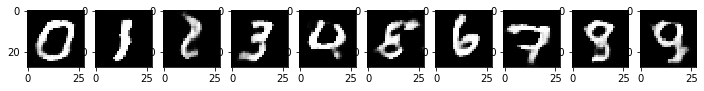

Epoch = 21 Gen = 0.7000526179319252 Dis = 1.3861176807488969


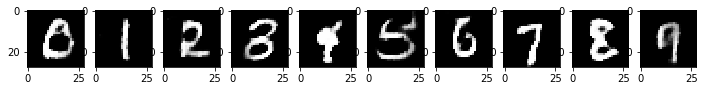

Epoch = 22 Gen = 0.6997655849975309 Dis = 1.385473888438902


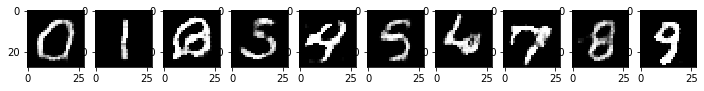

Epoch = 23 Gen = 0.6996788474987311 Dis = 1.3856254664819632


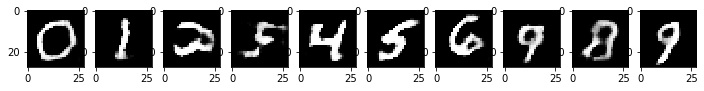

Epoch = 24 Gen = 0.6978688390651492 Dis = 1.3857013856424198


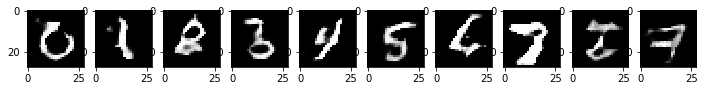

Epoch = 25 Gen = 0.6978425084273698 Dis = 1.385923084165496


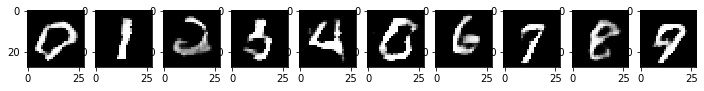

Epoch = 26 Gen = 0.6971884297727268 Dis = 1.386110917591591


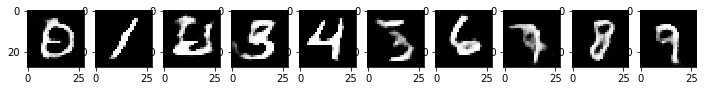

Epoch = 27 Gen = 0.6965398478037768 Dis = 1.3861185525780293


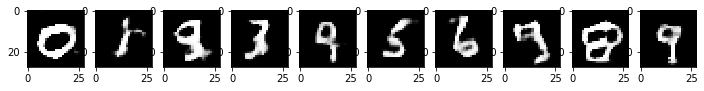

Epoch = 28 Gen = 0.6974086319205604 Dis = 1.3858634657951305


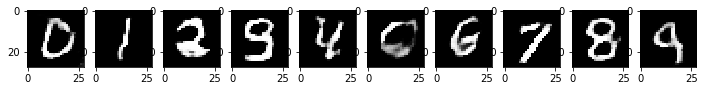

Epoch = 29 Gen = 0.696529968143272 Dis = 1.3857666870424235


In [4]:

device='cuda' if torch.cuda.is_available() else 'cpu'

transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize(mean=[0.5],
                                std=[0.5])])

train_data=dsets.MNIST(root='MNIST_data/',train=True,transform=transform,download=True)
train_loader=DataLoader(dataset=train_data,shuffle=True,batch_size=64)

NetG=Generator().to(device)
NetD=Discriminator().to(device)

#NetG.load_state_dict(torch.load('param/DCGAN_G.pth'))
#NetD.load_state_dict(torch.load('param/DCGAN_D.pth'))

criterion=nn.BCELoss()

optim_G=optim.Adam(NetG.parameters(),lr=0.001,betas=(0.5,0.999))
optim_D=optim.Adam(NetD.parameters(),lr=0.001,betas=(0.5,0.999))

for epoch in range(30):
    avg_G,avg_D=0.0,0.0
    for X,Y in train_loader:
        X,Y=X.to(device), to_onehot(Y).to(device)
        
        real_label=torch.ones(X.size(0),1).to(device)
        fake_label=torch.zeros(X.size(0),1).to(device)        
        rand=torch.randn(X.size(0),100).to(device)
        
        ### Discriminator Loss ###        
        real_output=NetD(X,Y)
        fake_output=NetD(NetG(rand,Y),Y)
        
        cost_D_Real=criterion(real_output,real_label)
        cost_D_Fake=criterion(fake_output,fake_label)
                              
        cost_D=cost_D_Real+cost_D_Fake
        
        optim_D.zero_grad()
        cost_D.backward()        
        optim_D.step()        
        
        ### Generator Loss ###
        rand=torch.randn(X.size(0),100).to(device)
        Gen_img=NetG(rand,Y)      
        
        cost_G=criterion(NetD(Gen_img,Y),real_label)
        
        optim_G.zero_grad()
        cost_G.backward()        
        optim_G.step()
        
        avg_D+=cost_D.item()
        avg_G+=cost_G.item()
        
    with torch.no_grad():
        rand=torch.randn(10,100).to(device)
        Y_test=torch.LongTensor([i for i in range(10)])
        Y_test=to_onehot(Y_test).to(device)

        predict=NetG(rand,Y_test)

        fig,(axes)=plt.subplots(1,10,figsize=(12,12))
        for i,ax in enumerate(axes):
            ax.imshow(predict[i].view(28,28).detach().cpu().numpy(),cmap='gray')
        plt.show()
    
    avg_D/=len(train_loader)
    avg_G/=len(train_loader)
    
    torch.save(NetG.state_dict(),'param/DCGAN_G.pth')
    torch.save(NetD.state_dict(),'param/DCGAN_D.pth')
    print('Epoch =',epoch,'Gen =',avg_G,'Dis =',avg_D)